In [1]:
import cdsapi
import matplotlib.pyplot as plt

In [8]:

c = cdsapi.Client()

c.retrieve(
    'seasonal-original-single-levels',
    {
        'format': 'grib',
        'originating_centre': 'meteo_france',
        'system': '8',
        'variable': '2m_temperature',
        'year': '2023',
        'month': '02',
        'day': '01',
        'leadtime_hour': '12',
    },
    'download.grib')

2023-08-09 12:48:08,708 INFO Welcome to the CDS
2023-08-09 12:48:08,709 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/seasonal-original-single-levels
2023-08-09 12:48:08,924 INFO Request is queued


KeyboardInterrupt: 

In [3]:
c.sleep_max

120

In [9]:
c = cdsapi.Client()

c.retrieve(
    'reanalysis-era5-single-levels',
    {
        'product_type': 'reanalysis',
        'format': 'grib',
        'variable': '2m_temperature',
        'year': '2020',
        'month': '04',
        'day': '04',
        'time': '07:00',
    },
    'download.grib')

2023-08-09 13:11:38,621 INFO Welcome to the CDS
2023-08-09 13:11:38,622 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2023-08-09 13:11:38,840 INFO Request is queued
2023-08-09 13:11:40,025 INFO Request is completed
2023-08-09 13:11:40,026 INFO Downloading https://download-0014-clone.copernicus-climate.eu/cache-compute-0014/cache/data1/adaptor.mars.internal-1691611898.9333227-27853-5-9626bf81-2b14-483b-8628-0fcd17c15161.grib to download.grib (2M)
2023-08-09 13:11:42,328 INFO Download rate 881.2K/s 


Result(content_length=2076600,content_type=application/x-grib,location=https://download-0014-clone.copernicus-climate.eu/cache-compute-0014/cache/data1/adaptor.mars.internal-1691611898.9333227-27853-5-9626bf81-2b14-483b-8628-0fcd17c15161.grib)

In [6]:
import time

In [10]:
c = cdsapi.Client()

c.retrieve(
    'seasonal-original-single-levels',
    {
        'format': 'grib',
        'originating_centre': 'ncep',
        'system': '2',
        'variable': '2m_temperature',
        'year': '2019',
        'month': '09',
        'day': '03',
        'leadtime_hour': '12',
    },
    'download.grib')

2023-08-09 13:13:09,125 INFO Welcome to the CDS
2023-08-09 13:13:09,126 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/seasonal-original-single-levels
2023-08-09 13:13:09,309 INFO Request is queued


KeyboardInterrupt: 

In [11]:
c = cdsapi.Client()

c.retrieve(
    'seasonal-original-pressure-levels',
    {
        'format': 'grib',
        'variable': 'temperature',
        'originating_centre': 'jma',
        'system': '3',
        'year': '2020',
        'pressure_level': '500',
        'month': '05',
        'day': '16',
        'leadtime_hour': '60',
    },
    'download.grib')

2023-08-09 13:15:02,710 INFO Welcome to the CDS
2023-08-09 13:15:02,711 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/seasonal-original-pressure-levels
2023-08-09 13:15:02,913 INFO Request is queued


KeyboardInterrupt: 

In [26]:
c.key

'241774:fab0d148-f23d-44bd-8e67-993c77cb5722'

In [27]:
c = cdsapi.Client()

c.retrieve(
    'seasonal-original-pressure-levels',
    {
        'originating_centre': 'ncep',
        'system': '2',
        'variable': 'temperature',
        'pressure_level': '500',
        'year': '2020',
        'month': '05',
        'day': '16',
        'leadtime_hour': '60',
        'format': 'netcdf',
    },
    'download.nc')

2023-08-09 13:23:37,744 INFO Welcome to the CDS
2023-08-09 13:23:37,745 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/seasonal-original-pressure-levels
2023-08-09 13:23:37,995 INFO Request is queued


# Read Grib

https://kpegion.github.io/Pangeo-at-AOES/examples/read-grib.html

In [2]:
import xarray as xr

In [3]:
data = xr.open_dataset('download.grib',engine='cfgrib')

In [5]:
data

<xarray.Dataset>
Dimensions:     (latitude: 721, longitude: 1440)
Coordinates:
    number      int64 ...
    time        datetime64[ns] ...
    step        timedelta64[ns] ...
    surface     float64 ...
  * latitude    (latitude) float64 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * longitude   (longitude) float64 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
    valid_time  datetime64[ns] ...
Data variables:
    t2m         (latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2023-08-09T14:37 GRIB to CDM+CF via cfgrib-0.9.1...

In [6]:
data['t2m']

<xarray.DataArray 't2m' (latitude: 721, longitude: 1440)>
[1038240 values with dtype=float32]
Coordinates:
    number      int64 ...
    time        datetime64[ns] ...
    step        timedelta64[ns] ...
    surface     float64 ...
  * latitude    (latitude) float64 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * longitude   (longitude) float64 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
    valid_time  datetime64[ns] ...
Attributes: (12/30)
    GRIB_paramId:                             167
    GRIB_dataType:                            an
    GRIB_numberOfPoints:                      1038240
    GRIB_typeOfLevel:                         surface
    GRIB_stepUnits:                           1
    GRIB_stepType:                            instant
    ...                                       ...
    GRIB_shortName:                           2t
    GRIB_totalNumber:                         0
    GRIB_units:                               K
    long_name:                                2 metre temperature
    units:                                    K
    standard_name:                            unknown

In [8]:
data['t2m'].sel(latitude=50, longitude=10)

<xarray.DataArray 't2m' ()>
[1 values with dtype=float32]
Coordinates:
    number      int64 ...
    time        datetime64[ns] ...
    step        timedelta64[ns] ...
    surface     float64 ...
    latitude    float64 50.0
    longitude   float64 10.0
    valid_time  datetime64[ns] ...
Attributes: (12/30)
    GRIB_paramId:                             167
    GRIB_dataType:                            an
    GRIB_numberOfPoints:                      1038240
    GRIB_typeOfLevel:                         surface
    GRIB_stepUnits:                           1
    GRIB_stepType:                            instant
    ...                                       ...
    GRIB_shortName:                           2t
    GRIB_totalNumber:                         0
    GRIB_units:                               K
    long_name:                                2 metre temperature
    units:                                    K
    standard_name:                            unknown

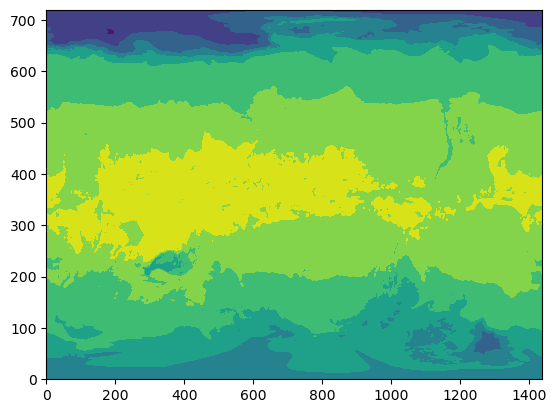

In [9]:
plt.contourf(data['t2m'])